In [4]:
install.packages(c('dplyr', 'vcd'))
library(dplyr)
library(vcd)

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid


In [77]:
samplesize <- 100000
sex <- factor(floor(runif(n = samplesize, min = 0, max = 3)), labels = c("male", "female", "other"))
agegroup <- factor(floor(runif(n = samplesize, min = 0, max = 5)), labels = c("10s", "20s", "30s", "40s", "50s"))
d <- data.frame(sex, agegroup)

# クリック率を属性ごとに偏らせてみる

In [109]:
# 偏りのないデータ
ad_click1 <- d %>% mutate(
  click = factor(case_when(
    TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(交互作用なし)
ad_click2 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' ~ rbinom(n(), 1, 0.005)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(交互作用あり)
ad_click3 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.005)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)
# 偏りのあるデータ(単純作用+交互作用)
ad_click4 <- d %>% mutate(
  click = factor(case_when(
    sex == 'female' & agegroup == '20s' ~ rbinom(n(), 1, 0.005)
    , agegroup == '30s' ~ rbinom(n(), 1, 0.003)
    , TRUE ~ rbinom(n(), 1, 0.003)
  )
  , labels = c('no', 'yes')
  )
)

In [94]:
summary(ad_click1)

     sex        agegroup    click      
 male  :33705   10s:19943   no :99713  
 female:33401   20s:20210   yes:  287  
 other :32894   30s:19987              
                40s:19830              
                50s:20030              

In [95]:
summary(ad_click2)

     sex        agegroup    click      
 male  :33705   10s:19943   no :99632  
 female:33401   20s:20210   yes:  368  
 other :32894   30s:19987              
                40s:19830              
                50s:20030              

In [96]:
summary(ad_click3)

     sex        agegroup    click      
 male  :33705   10s:19943   no :99683  
 female:33401   20s:20210   yes:  317  
 other :32894   30s:19987              
                40s:19830              
                50s:20030              

In [97]:
summary(ad_click4)

     sex        agegroup    click      
 male  :33705   10s:19943   no :99702  
 female:33401   20s:20210   yes:  298  
 other :32894   30s:19987              
                40s:19830              
                50s:20030              

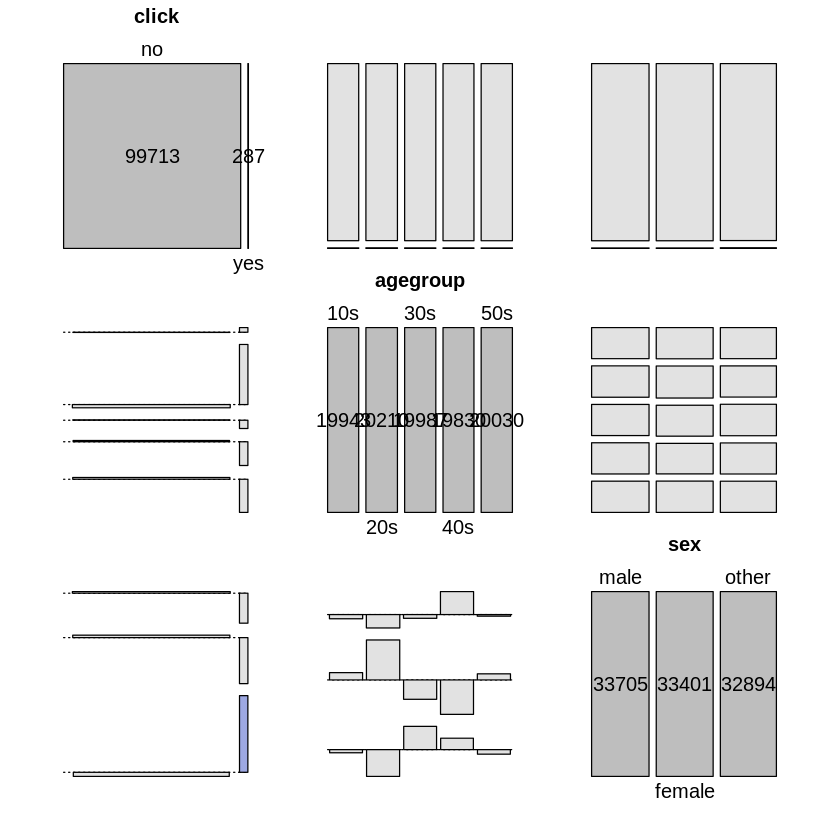

In [98]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click1), lower_panel= vcd::pairs_assoc, shade=TRUE)

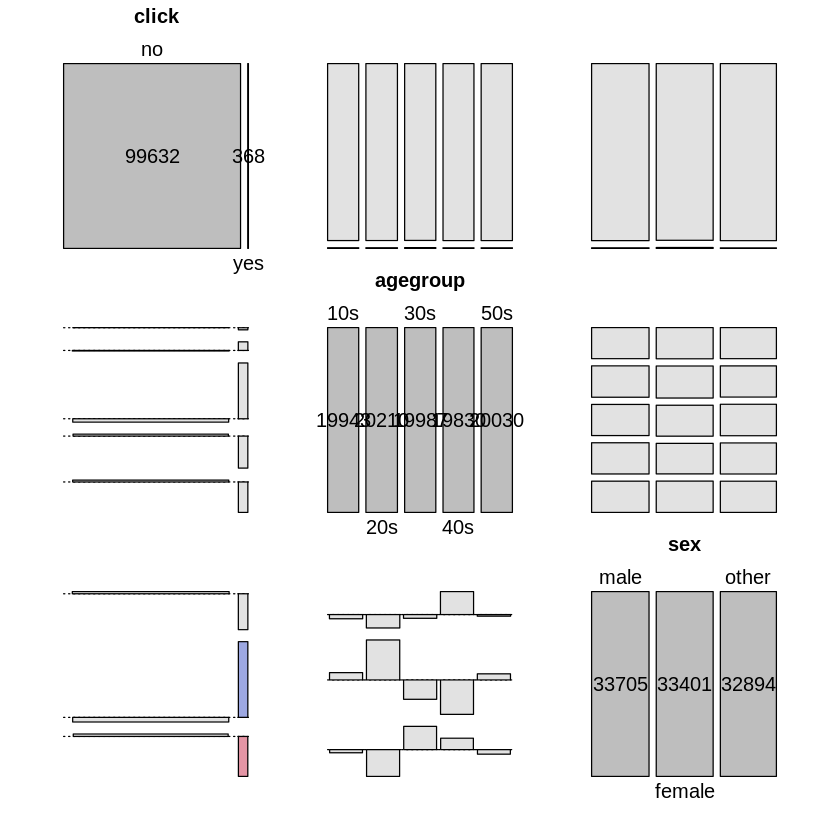

In [99]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click2), lower_panel= vcd::pairs_assoc, shade=TRUE)

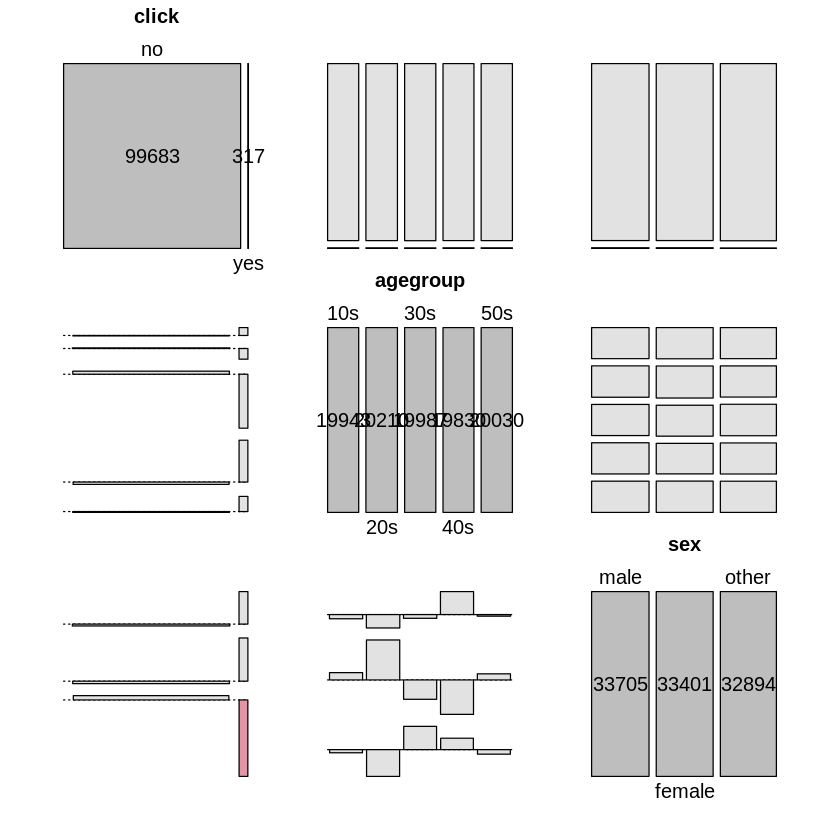

In [100]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click3), lower_panel= vcd::pairs_assoc, shade=TRUE)

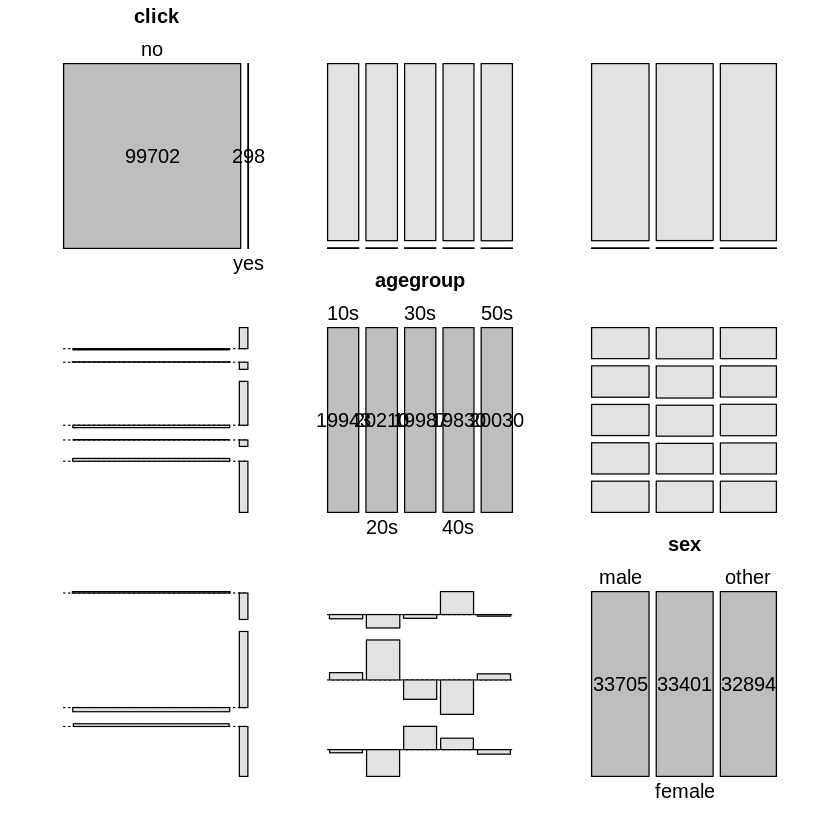

In [101]:
# visualization
pairs(xtabs(~ click + agegroup + sex, data=ad_click4), lower_panel= vcd::pairs_assoc, shade=TRUE)

In [110]:
# modeling
# 偏りのないデータなので、差が有意となってほしくない。
ad_click1.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click1, family="binomial")
summary(ad_click1.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0968  -0.0845  -0.0806  -0.0753   3.6045  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.86423    0.22974 -25.525   <2e-16 ***
sexfemale              0.15170    0.31367   0.484   0.6287    
sexother               0.12444    0.31710   0.392   0.6947    
agegroup20s            0.13723    0.31366   0.438   0.6617    
agegroup30s            0.23197    0.30757   0.754   0.4507    
agegroup40s           -0.17707    0.33975  -0.521   0.6022    
agegroup50s            0.14168    0.31366   0.452   0.6515    
sexfemale:agegroup20s -0.16303    0.43542  -0.374   0.7081    
sexother:agegroup20s  -0.09469    0.43791  -0.216   0.8288    
sexfemale:agegroup30s -1.01410    0.49026  -2.069   0.0386 *  
sexother:agegroup30s   0.14653    0.41807   0.350   0.7260    
sexfemale:a

In [111]:
# modeling
# femaleのときにクリックしやすいように偏らせているので、sexfemaleについて有意となってほしい
ad_click2.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click2, family="binomial")
summary(ad_click2.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.1109  -0.0999  -0.0839  -0.0773   3.4545  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.812786   0.223930 -25.958   <2e-16 ***
sexfemale              0.444552   0.287321   1.547    0.122    
sexother               0.119667   0.309436   0.387    0.699    
agegroup20s           -0.009816   0.316682  -0.031    0.975    
agegroup30s            0.046551   0.312905   0.149    0.882    
agegroup40s           -0.056213   0.320808  -0.175    0.861    
agegroup50s            0.367536   0.291163   1.262    0.207    
sexfemale:agegroup20s  0.289279   0.395793   0.731    0.465    
sexother:agegroup20s  -0.089926   0.442766  -0.203    0.839    
sexfemale:agegroup30s  0.024427   0.400965   0.061    0.951    
sexother:agegroup30s  -0.317615   0.449972  -0.706    0.480    

In [114]:
# modeling
# femaleかつ20sのときにクリックしやすいように偏らせているので、sexfemale:agegroup20sについて有意となってほしい
ad_click3.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click3, family="binomial")
summary(ad_click3.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0982  -0.0829  -0.0753  -0.0699   3.5079  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -5.672576   0.208869 -27.159   <2e-16 ***
sexfemale              0.004646   0.295387   0.016    0.987    
sexother              -0.221827   0.315160  -0.704    0.482    
agegroup20s           -0.312989   0.320282  -0.977    0.328    
agegroup30s           -0.046990   0.298710  -0.157    0.875    
agegroup40s           -0.250639   0.315150  -0.795    0.426    
agegroup50s            0.037340   0.292302   0.128    0.898    
sexfemale:agegroup20s  0.649665   0.420306   1.546    0.122    
sexother:agegroup20s   0.056941   0.479381   0.119    0.905    
sexfemale:agegroup30s -0.308830   0.442135  -0.698    0.485    
sexother:agegroup30s   0.140182   0.441672   0.317    0.751    

In [113]:
# modeling
# femaleかつ20sのときにクリックしやすいように偏らせている
# あと30sのときにクリックしやすいように偏らせている
ad_click4.glm <- glm(formula = click ~ sex + agegroup + sex:agegroup, data = ad_click4, family="binomial")
summary(ad_click4.glm)


Call:
glm(formula = click ~ sex + agegroup + sex:agegroup, family = "binomial", 
    data = ad_click4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.1054  -0.0944  -0.0773  -0.0722   3.4925  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -5.8128     0.2239 -25.958   <2e-16 ***
sexfemale              -0.2838     0.3419  -0.830    0.407    
sexother               -0.1389     0.3303  -0.421    0.674    
agegroup20s             0.4620     0.2856   1.618    0.106    
agegroup30s             0.2215     0.3005   0.737    0.461    
agegroup40s             0.4022     0.2892   1.391    0.164    
agegroup50s            -0.1110     0.3253  -0.341    0.733    
sexfemale:agegroup20s   0.4452     0.4181   1.065    0.287    
sexother:agegroup20s   -0.5269     0.4507  -1.169    0.242    
sexfemale:agegroup30s   0.5150     0.4353   1.183    0.237    
sexother:agegroup30s   -0.1224     0.4495  -0.272    0.785    
sexfemale:a